Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
ess = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')

In [16]:
ess.info()
ess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [18]:
ess.groupby(['cntry']).agg(['count'])

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
,count,count,count,count,count,count,count,count,count,count,count,count
cntry,,,,,,,,,,,,
CH,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475
CZ,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207
DE,27,27,27,27,27,27,27,27,27,27,27,27
ES,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
NO,1420,1420,1420,1420,1420,1420,1420,1420,1420,1420,1420,1420
SE,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726


There are 6 countries included in the survey with the following number of respondents.

CH- Switzerland, 1475 respondents.
CZ- Czeh Repuplic, 1207 respondents.
DE - Germany, 27 respondents.
ES - Spain, 2292 respondents.
NO - Norway, 1420 respondents.
SE - Sweden, 1726 respondents.

# Did people become less trusting from 2012 to 2014?

Plotting trust in all countries as a general information in identifying if people in these countries became more less trusting.

In [58]:
#Separating 2012 and 2014
ess_2012 = ess[ess.year == 6]
ess_2014 = ess[ess.year == 7]

Text(0.5, 1.0, 'People became less trusting in 2012 and 2014')

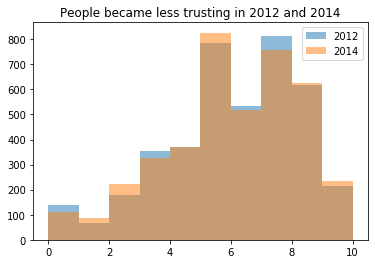

In [75]:
plt.hist(ess_2012['ppltrst'], alpha = .5)
plt.hist(ess_2014['ppltrst'], alpha =.5)
plt.legend(['2012', '2014'])
plt.title('People became less trusting in 2012 and 2014')

In [77]:
print(stats.describe(ess_2012['ppltrst']))
print(stats.describe(ess_2014['ppltrst']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [70]:
print(stats.shapiro(ess_2012['ppltrst']))
print(stats.shapiro(ess_2014['ppltrst']))

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)


# Did people become happier from 2012 to 2014?

Plotting trust in all countries as a general information in identifying if people in these countries became happier.

Text(0.5, 1.0, 'People became less trusting in 2012 and 2014')

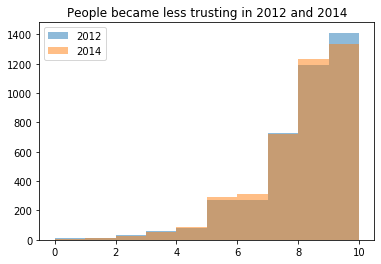

In [80]:
plt.hist(ess_2012['happy'], alpha = .5)
plt.hist(ess_2014['happy'], alpha = .5)

plt.legend(['2012', '2014'])
plt.title('People became less trusting in 2012 and 2014')

In [82]:
print(stats.describe(ess_2012['happy']))
print(stats.describe(ess_2014['happy']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [89]:
print(stats.shapiro(ess_2012['happy']))
print(stats.shapiro(ess_2014['happy']))

(0.8943395018577576, 0.0)
(0.9060227870941162, 1.2611686178923354e-44)


In [88]:
print(stats.kruskal(ess_2012['happy'], ess_2014['happy']))

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)


# Pick three or four of the countries in the sample and compare how often people met socially in 2014. 


In [115]:
ess_2014_ES = ess_2014[ess_2014.cntry == 'ES']
ess_2014_NO = ess_2014[ess_2014.cntry == 'NO']
ess_2014_CZ = ess_2014[ess_2014.cntry == 'CZ']
ess_2014_DE = ess_2014[ess_2014.cntry == 'DE']

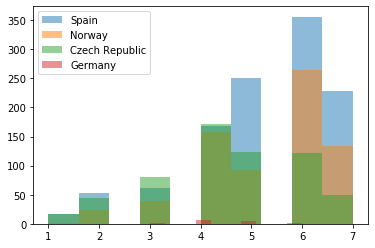

In [106]:
plt.hist(ess_2014_ES['sclmeet'], alpha =.5)
plt.hist(ess_2014_NO['sclmeet'], alpha =.5)
plt.hist(ess_2014_CZ['sclmeet'], alpha =.5)
plt.hist(ess_2014_DE['sclmeet'], alpha =.5)
plt.legend(['Spain','Norway','Czech Republic', 'Germany'])

In [110]:
print(stats.describe(ess_2014['sclmeet']))
print(stats.shapiro(ess_2014['sclmeet']))

DescribeResult(nobs=4076, minmax=(1, 7), mean=5.174926398429833, variance=2.011356436299271, skewness=-0.6316981913308871, kurtosis=-0.2465243115131006)
(0.9055705070495605, 1.1210387714598537e-44)


# Are there differences, and if so, which countries stand out?

In 2014, there are significant differences in the countries that meet. Spain is the most social country as they meet more often. Germany would be the less sociable as they do not meet as much as spain

In [111]:
stats.kruskal(ess_2014_ES['sclmeet'], ess_2014_NO['sclmeet'],
             ess_2014_CZ['sclmeet'], ess_2014_DE['sclmeet'])

KruskalResult(statistic=143.47404089941557, pvalue=6.734890796116638e-31)

# Ruff Figural Fluency Test

In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rfft = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
rfft.info()
rfft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         7545 non-null   int64  
 1   Age            7545 non-null   int64  
 2   Gender         7545 non-null   object 
 3   Education      7545 non-null   object 
 4   Measurement    7545 non-null   object 
 5   Unique         7545 non-null   float64
 6   Perseverative  7545 non-null   float64
 7   Interval       7545 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [130]:
rfft_measure_unique = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_measure_unique

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0
...,...,...,...
2511,84.0,95.0,90.5
2512,91.0,50.0,92.0
2513,73.0,62.0,54.0


(array([  6.,  18.,  44., 208., 524., 865., 557., 226.,  59.,   8.]),
 array([-75.5, -61.1, -46.7, -32.3, -17.9,  -3.5,  10.9,  25.3,  39.7,
         54.1,  68.5]),
 <a list of 10 Patch objects>)

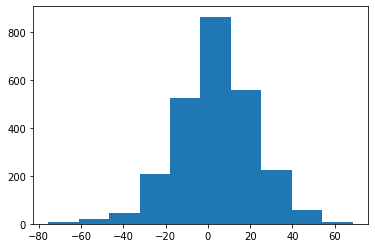

In [134]:
plt.hist(rfft_measure_unique['Measurement 3 (2008-2012)'] - rfft_measure_unique['Measurement 2 (2006-2008)'])


In [135]:
print(stats.describe(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']))

DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


In [136]:

rfft_per = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_per.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

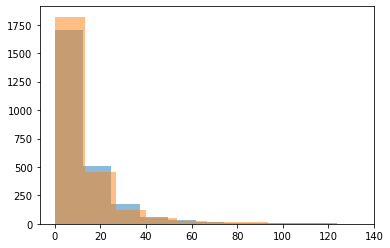

In [126]:
plt.hist(rfft_per['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_per['Measurement 2 (2006-2008)'], alpha = .5)

In [127]:
stats.wilcoxon(rfft_per['Measurement 3 (2008-2012)'], rfft_per['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)